In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import geopandas
import geoplot
import geoplot.crs as gcrs

import json
import seaborn as sns

In [3]:
yield_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\hvstat_africa_data.csv')
yield_data = yield_data.loc[(yield_data['product'] == 'Maize')]
kenya_data = yield_data.loc[yield_data['country'] == 'Kenya']

In [4]:
#kenya_data.loc[kenya_data['season_name'] == 'Long']#dropna(subset = ['production'])

In [57]:
#fig, ax = plt.subplots()
#sns.barplot(data = yield_data, x = 'admin_1', y='value', estimator = 'mean', errorbar = 'sd', ax=ax)
#ax.tick_params(axis='x', labelrotation=90)

In [ ]:
adm_data = geopandas.read_file('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\KE_boundaries\\adm_boundaries.geojson')
adm_data.drop(columns = ['end_date', 'country_code', 
                         'fewsnet_region', 'geographic_group', 
                         'es_name', 'fr_name', 'pt_name',
                         'ar_name', 'country', 'admin_0',
                         'admin_3', 'admin_4', 'layer_id',
                         'geographicunitsetversion_name', 'zone_type', 'urban_rural', 'start_month',
                         'layer_name'
                         ], inplace=True)
#adm_data = adm_data.explode()#.crs
adm_data = adm_data.loc[adm_data['unit_type_code'] == 'admin1']
adm_data = adm_data.loc[(adm_data['name'] != 'Nairobi') & (adm_data['name'] != 'Mombasa')]
adm_data.loc[:, 'centroid'] = adm_data.loc[:, 'geometry'].to_crs(crs=3857).centroid.to_crs('EPSG:4326')
adm_data_for_merging = adm_data.drop_duplicates(subset = ['fnid']).drop(columns=['fnid', 'admin_2', 'start_date', 'id'])
yield_data_polygons = adm_data_for_merging.merge(yield_data, on=['admin_1'], how='right', suffixes=('raw', 'cropped')).dropna()#yield_data.merge(, on=['fnid'], how='left')#, validate='one_to_many')

Skipping field centroid: unsupported OGR type: 3


In [54]:
yield_data.columns.to_list()

['fnid',
 'country',
 'country_code',
 'admin_1',
 'admin_2',
 'product',
 'season_name',
 'planting_year',
 'planting_month',
 'harvest_year',
 'harvest_month',
 'crop_production_system',
 'qc_flag',
 'area',
 'production',
 'yield']

In [82]:
adm_data['area discrepancy'] = adm_data['geometry'].to_crs(crs=3857).area/adm_data['area']

In [86]:
adm_data.loc[(adm_data['area discrepancy']) < 1].sort_values(by='area discrepancy', ascending=False).head()

,id,fnid,name,unit_type_code,parent_id,start_date,p_code,full_name,unit_type,admin_1,admin_2,area,attributes,fid,geometry,centroid,area discrepancy


In [ ]:
yield_data['prod_from_yield'] = yield_data['yield']*yield_data['area']

In [59]:
yield_data['prop_error'] = yield_data['prod_from_yield']/yield_data['production']

In [61]:
yield_data['prop_error'].max()

1.0000000000000004

<Axes: ylabel='Count'>

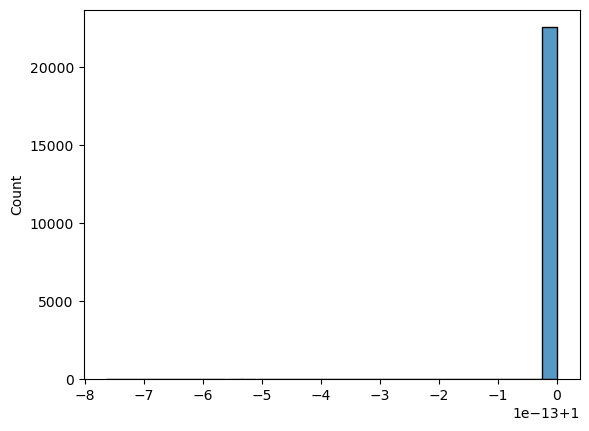

In [58]:
sns.histplot(yield_data['prod_from_yield']/yield_data['production'], bins=30)

In [30]:
yield_data_polygons.columns.to_list()

['name',
 'unit_type_code',
 'parent_id',
 'p_code',
 'full_name',
 'unit_type',
 'admin_1',
 'arearaw',
 'attributes',
 'fid',
 'geometry',
 'centroid',
 'fnid',
 'country',
 'country_code',
 'admin_2',
 'product',
 'season_name',
 'planting_year',
 'planting_month',
 'harvest_year',
 'harvest_month',
 'crop_production_system',
 'qc_flag',
 'areacropped',
 'production',
 'yield']

In [17]:
#for year in range(1975, 2025):
#    obsnum = len(yield_data_polygons.loc[yield_data_polygons['season_year'] == f'Annual harvest {year}'])
#    print(f'Year {year}: {obsnum}')
#for_plotting = yield_data_polygons.loc[yield_data_polygons['season_year'] == 'Annual harvest 2020']#.columns.to_list()
#geoplot.polyplot(for_plotting)
#fig, ax = plt.subplots()
#yield_plot = geoplot.choropleth(for_plotting, hue='value', cmap='Oranges', ax=ax, legend=True)
#plt.colorbar(yield_plot)

In [12]:
#fig, axs = plt.subplots(1, 2)
#norm = mpl.colors.Normalize(vmin=0.,vmax=3.5)
#geoplot.choropleth(yield_data_mean.dropna(), hue='value', cmap='Oranges', ax=axs[0], legend=True, norm=norm, legend_kwargs={'fraction': 0.05})
#norm = mpl.colors.Normalize(vmin=0.,vmax=1)
#geoplot.choropleth(yield_data_std.dropna(), hue='value', cmap='Blues', ax=axs[1], legend=True, norm=norm, legend_kwargs={'fraction': 0.05})

In [ ]:
adm1 = ['Isiolo', 'Turkana', 'Marsabit', 'Wajir', 'Mandera', 'Garissa']

<Axes: ylabel='Count'>

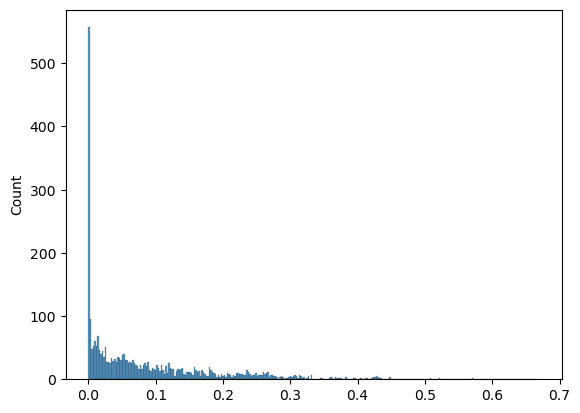

In [89]:
sns.histplot(yield_data_polygons['areacropped']/(yield_data_polygons['arearaw']*100), bins=300)

In [93]:
yield_data_polygons['maize density'] = yield_data_polygons['areacropped']/(yield_data_polygons['arearaw']*100)

In [67]:
yield_data_polygons.columns.to_list()

['name',
 'unit_type_code',
 'parent_id',
 'p_code',
 'full_name',
 'unit_type',
 'admin_1',
 'arearaw',
 'attributes',
 'fid',
 'geometry',
 'centroid',
 'fnid',
 'country',
 'country_code',
 'admin_2',
 'product',
 'season_name',
 'planting_year',
 'planting_month',
 'harvest_year',
 'harvest_month',
 'crop_production_system',
 'qc_flag',
 'areacropped',
 'production',
 'yield',
 'prod_from_yield',
 'prop_error',
 'maize density']

In [92]:
yield_data_polygons.loc[yield_data_polygons['maize density'] < 0.1].iloc[:, :]['name'].unique()#.head()#['planting_year'].unique()#min()

array(['Kwale', 'Kilifi', 'Tana River', 'Lamu', 'Taita Taveta', 'Garissa',
       'Wajir', 'Mandera', 'Marsabit', 'Isiolo', 'Turkana', 'West Pokot',
       'Samburu', 'Trans Nzoia', 'Elgeyo-Marakwet', 'Baringo', 'Laikipia',
       'Nakuru', 'Kajiado', 'Bomet'], dtype=object)

In [25]:
#yield_data_polygons.dropna()#.columns.to_list()

In [94]:
mean_yields = yield_data_polygons[['admin_1', 'geometry', 'yield']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()
mean_prod = yield_data_polygons[['admin_1', 'geometry', 'production']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()
mean_density = yield_data_polygons[['admin_1', 'geometry', 'maize density']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()

In [101]:
std_yields = yield_data_polygons[['admin_1', 'geometry', 'yield']].dissolve(by = 'admin_1', aggfunc='std').reset_index()

In [95]:
mean_prod = mean_prod.explode()
mean_yields = mean_yields.explode()
mean_density = mean_density.explode()

In [64]:
mean_prod.loc[:, 'centroid'] = mean_prod.loc[:, 'geometry'].to_crs(crs=3857).centroid.to_crs('EPSG:4326')

In [65]:
mean_prod.set_geometry('centroid', inplace=True)

In [68]:
empty_point = mean_prod['centroid'].unique()[0]
mean_prod = mean_prod.loc[mean_prod['centroid'] != empty_point]

Text(0.5, 0.98, 'Mean yield, annual yield variation and maize density by admin1 in Kenya')

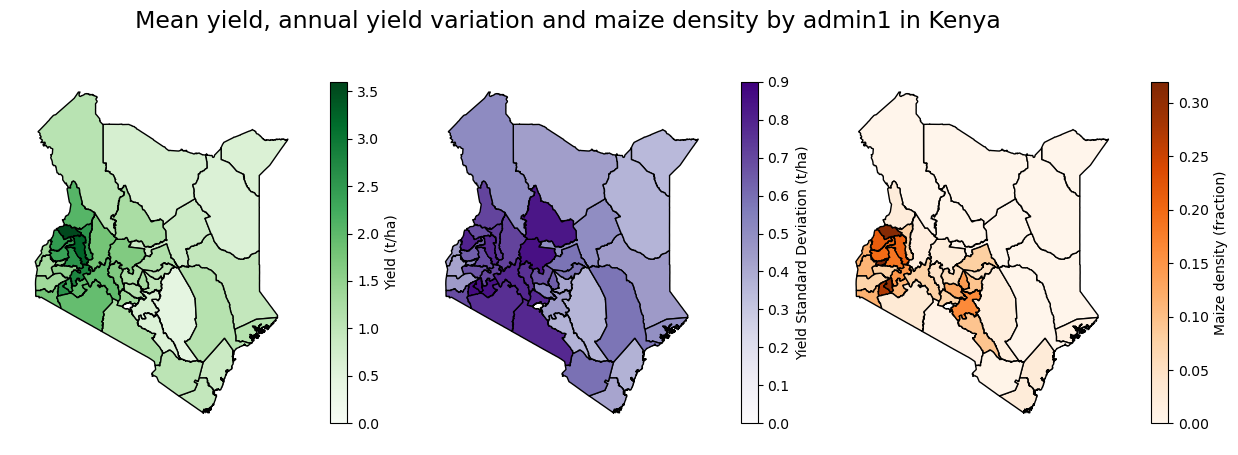

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
norm = mpl.colors.Normalize(vmin=0.,vmax=3.6)
geoplot.choropleth(mean_yields.dropna().explode(), hue='yield', cmap='Greens',norm=norm, ax=axs[0], legend=True, legend_kwargs={'fraction': 0.05, 'label': 'Yield (t/ha)'})
#norm = mpl.colors.Normalize(vmin=0.,vmax=1)
#geoplot.choropleth(mean_prod.dropna().explode(), hue='production', cmap='Blues', ax=axs[1], legend=True, legend_kwargs={'fraction': 0.05})
#geoplot.cartogram(mean_prod.dropna().explode(), scale='production', ax=axs[1])
#mean_prod.set_geometry('centroid', inplace=True)
#geoplot.pointplot(mean_prod.dropna(), hue='production', ax=axs[1])#, legend=True, legend_kwargs={'fraction': 0.05}, cmap='Blues', scale='production', limits=(0, None))
#mean_prod.set_geometry('geometry', inplace=True)
#geoplot.polyplot(mean_prod.explode(), ax=axs[1])
norm = mpl.colors.Normalize(vmin=0.,vmax=0.32)
geoplot.choropleth(mean_density.dropna().explode(), hue='maize density', cmap='Oranges', ax=axs[2], norm=norm, legend=True, legend_kwargs={'fraction': 0.05, 'label': 'Maize density (fraction)'})
norm = mpl.colors.Normalize(vmin=0.,vmax=0.9)
geoplot.choropleth(std_yields.dropna().explode(), hue='yield', norm=norm, cmap='Purples', ax=axs[1], legend=True, legend_kwargs={'fraction': 0.05, 'label': 'Yield Standard Deviation (t/ha)'})
fig.suptitle('Mean yield, annual yield variation and maize density by admin1 in Kenya', fontsize = 17)

<Axes: xlabel='maize density', ylabel='Count'>

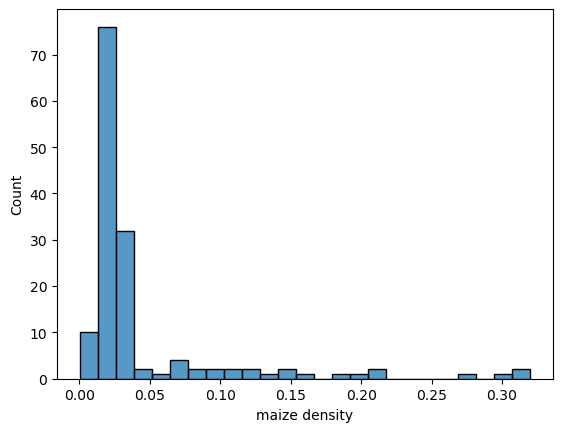

In [118]:
sns.histplot(mean_density['maize density'])

In [25]:
#for_plotting['value']

In [26]:
#adm_data.apply(lambda srs: eval(srs[13])['FNID'], axis = 1)#.iloc[0, 13]['attributes']['FNID']

In [27]:
#geom = adm_data.pop('geometry')
#geom = geom.apply(lambda x: list(x) if isinstance(x, geopandas.MultiPolygon) else x).explode()
#adm_data = adm_data.join(geom, how='inner')

In [97]:
#yield_data[['admin_2', 'value']].groupby('admin_2').std()

In [28]:
#sns.barplot(yield_data.groupby('fnid'))